In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("HousePredictiontrain.csv")
test=pd.read_csv("HousePredictiontest.csv")

In [3]:
train.head(5)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Treating non null values

In [4]:
#dropping id from data frame
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [5]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


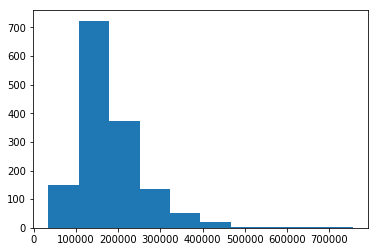

In [6]:
#Checking skewness of salesprice
train.SalePrice.skew()
plt.hist(train.SalePrice)
plt.show()

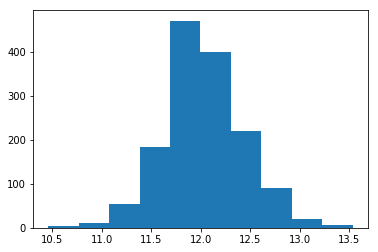

In [7]:
train.SalePrice=np.log(train.SalePrice)
plt.hist(train.SalePrice)
plt.show()

In [8]:
train.SalePrice.skew()

0.12133506220520406

In [9]:
#saving shapes of train and test data
strain=train.shape[0]
stest=test.shape[0]
y=train.SalePrice.values

In [10]:
#concat data
allData=pd.concat([train,test]);
allData.drop("SalePrice",axis=1,inplace=True)
allData.shape

/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2919, 79)

In [11]:
all_na = (allData.isnull().sum() / len(allData)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missData = pd.DataFrame({'Missing' :all_na})
missData.head(20)

,Missing
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


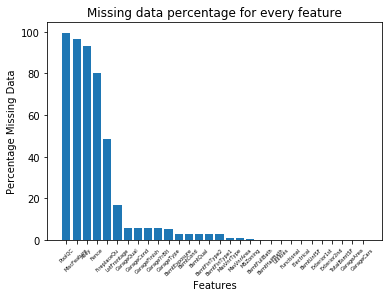

<Figure size 120000x7500 with 0 Axes>

In [12]:
plt.xlabel("Features")
plt.ylabel("Percentage Missing Data")
plt.title("Missing data percentage for every feature")
plt.bar(missData.index,missData.Missing)
plt.xticks(
    rotation=45, 
    fontsize=5
)
plt.figure(figsize=(400,25),dpi=300)
plt.show()

# Feature Tuning

In [13]:
#PoolQC
allData.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [14]:
allData.PoolQC=allData.PoolQC.fillna("None")

In [15]:
allData.PoolQC.value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [16]:
#MiscFeature
allData.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
allData.MiscFeature=allData.MiscFeature.fillna("None")
allData.MiscFeature.value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [18]:
#Alley
allData.Alley.value_counts()
allData.Alley=allData.Alley.fillna("None")
allData.Alley.value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [19]:
#Fence
allData.Fence=allData.Fence.fillna("None")
allData.Fence.value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [20]:
#FirePlaceQu
allData.FireplaceQu=allData.FireplaceQu.fillna("None")
allData.FireplaceQu.value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [21]:
#LotFrontage
#replacing with the mean of the neighbourhood's lotfrontage
allData.LotFrontage=allData.LotFrontage.fillna(allData.groupby("Neighborhood").LotFrontage.transform("median"))
allData[["Neighborhood","LotFrontage"]].head(5)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0


In [22]:
#GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish
allData.GarageYrBlt=allData.GarageYrBlt.fillna("None")
allData.GarageType=allData.GarageType.fillna("None")
allData.GarageCars=allData.GarageCars.fillna(0)
allData.GarageArea=allData.GarageArea.fillna(0)
allData.GarageQual=allData.GarageQual.fillna("None")
allData.GarageCond=allData.GarageCond.fillna("None")
allData.GarageFinish=allData.GarageFinish.fillna("None")

In [23]:
#"BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"
allData[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0


In [24]:
allData.BsmtQual=allData.BsmtQual.fillna("None")
allData.BsmtCond=allData.BsmtCond.fillna("None")
allData.BsmtExposure=allData.BsmtExposure.fillna("None")
allData.BsmtFinType1=allData.BsmtFinType1.fillna("None")
allData.BsmtFinType2=allData.BsmtFinType2.fillna("None")
allData['BsmtFullBath'] = allData['BsmtFullBath'].fillna(0)
allData['BsmtHalfBath'] = allData['BsmtHalfBath'].fillna(0)
allData['TotalBsmtSF'] = allData['TotalBsmtSF'].fillna(0)
allData['BsmtFinSF1'] = allData['BsmtFinSF1'].fillna(0)
allData['BsmtFinSF2'] = allData['BsmtFinSF2'].fillna(0)
allData['BsmtUnfSF'] = allData['BsmtUnfSF'].fillna(0)

In [25]:
#MasVnrArea, MasVnrType
allData.MasVnrType.value_counts()
allData.MasVnrType=allData.MasVnrType.fillna("None")
allData.MasVnrArea=allData.MasVnrArea.fillna(0)



In [26]:
#Electrical
allData.Electrical.value_counts()
#SBrkr is most frquent
allData.Electrical=allData.Electrical.fillna("SBrkr")

In [27]:
#MSZoning
allData.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [28]:
#fill na by RL most frequent
allData.MSZoning=allData.MSZoning.fillna("RL")

In [29]:
#Utilities
allData.Utilities.value_counts()
allData.Utilities=allData.Utilities.fillna("AllPub")

In [30]:
#Functional
allData.Functional.value_counts()
allData.Functional=allData.Functional.fillna("Typ")

In [31]:
#SaleType
allData.SaleType.value_counts()
allData.SaleType=allData.SaleType.fillna("WD")

In [32]:
#KitchenQual
allData.KitchenQual.value_counts()
allData.KitchenQual=allData.KitchenQual.fillna("TA")


In [33]:
#Exterior1st,Exterior2nd
allData.Exterior1st.value_counts()
allData.Exterior1st=allData.Exterior1st.fillna("VinylSd")

In [34]:
allData.Exterior2nd.value_counts()
allData.Exterior2nd=allData.Exterior2nd.fillna("VinylSd")

In [35]:
#checking if null exists
all_na = (allData.isnull().sum() / len(allData)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)


,Missing Ratio


# More Feature Tuning

In [36]:
#del Features
allData.Utilities.value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [37]:
#as it is almost of the same type ,so we can delete it
allData.drop("Utilities",axis=1,inplace=True)

In [38]:
#Correlation
train.corr(method="pearson").drop("SalePrice").sort_values("SalePrice",ascending=False).SalePrice

OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [39]:
#deleting the columns with correlation -0.1-0.1
allData.drop("PoolArea",axis=1,inplace=True)
allData.drop("MoSold",axis=1,inplace=True)
allData.drop("3SsnPorch",axis=1,inplace=True)
allData.drop("BsmtFinSF2",axis=1,inplace=True)
allData.drop("BsmtHalfBath",axis=1,inplace=True)
allData.drop("MiscVal",axis=1,inplace=True)
allData.drop("OverallCond",axis=1,inplace=True)
allData.drop("YrSold",axis=1,inplace=True)
allData.drop("LowQualFinSF",axis=1,inplace=True)
allData.drop("MSSubClass",axis=1,inplace=True)

In [40]:
#shape
allData.shape

(2919, 68)

In [41]:
#skewness of numerical featueres
numericalFeatures=allData.dtypes[allData.dtypes!=object].index

In [42]:
skew=allData[numericalFeatures].apply(lambda x:x.skew()).dropna().sort_values(ascending=False)
#forming Data Frame
numSkew=pd.DataFrame({"Skew":skew})
numSkew

,Skew
LotArea,12.829025
KitchenAbvGr,4.304467
EnclosedPorch,4.005950
ScreenPorch,3.948723
MasVnrArea,2.614936
OpenPorchSF,2.536417
WoodDeckSF,1.843380
LotFrontage,1.506478
1stFlrSF,1.470360
BsmtFinSF1,1.425963


In [43]:
#doing log transform for the features having >0.5 skewness 
numSkew=numSkew[abs(numSkew)>0.5]
allData[numSkew.index]=np.log(allData[numSkew.index])

/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
skewTmp=allData[numericalFeatures].apply(lambda x:x.skew()).dropna().sort_values(ascending=False)
numSkew=pd.DataFrame({"Skew":skewTmp})
numSkew

,Skew
1stFlrSF,0.063895
GrLivArea,0.012386
TotRmsAbvGrd,-0.087471
YearRemodAdd,-0.458397
LotArea,-0.505542
YearBuilt,-0.626551
OverallQual,-0.994161
LotFrontage,-1.058469


In [45]:
#categorical to num,num to categorical
#using dummies method of pandas

allData.shape


(2919, 68)

In [46]:
allData.head(5)

,1stFlrSF,2ndFlrSF,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,6.752270,6.749931,None,1.098612,1Fam,TA,No,6.559615,GLQ,Unf,...,Gable,Normal,WD,-inf,Pave,2.079442,6.752270,-inf,7.602401,7.602401
1,7.140453,-inf,None,1.098612,1Fam,TA,Gd,6.885510,ALQ,Unf,...,Gable,Normal,WD,-inf,Pave,1.791759,7.140453,5.697093,7.588830,7.588830
2,6.824374,6.763885,None,1.098612,1Fam,TA,Mn,6.186209,GLQ,Unf,...,Gable,Normal,WD,-inf,Pave,1.791759,6.824374,-inf,7.601402,7.601902
3,6.867974,6.628041,None,1.098612,1Fam,Gd,No,5.375278,ALQ,Unf,...,Gable,Abnorml,WD,-inf,Pave,1.945910,6.628041,-inf,7.557473,7.585789
4,7.043160,6.959399,None,1.386294,1Fam,TA,Av,6.484635,GLQ,Unf,...,Gable,Normal,WD,-inf,Pave,2.197225,7.043160,5.257495,7.600902,7.600902


In [47]:
allData=pd.get_dummies(allData)
allData=allData.replace([np.inf,-np.inf],0)
allData.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,6.752270,6.749931,1.098612,6.559615,0.0,5.010635,0.000000,0.0,0.693147,6.306275,...,0,0,0,0,0,0,0,1,0,1
1,7.140453,0.000000,1.098612,6.885510,0.0,5.648974,0.000000,0.0,0.693147,6.131226,...,0,0,0,0,0,0,0,1,0,1
2,6.824374,6.763885,1.098612,6.186209,0.0,6.073045,0.000000,0.0,0.693147,6.410175,...,0,0,0,0,0,0,0,1,0,1
3,6.867974,6.628041,1.098612,5.375278,0.0,6.291569,5.605802,0.0,0.000000,6.464588,...,0,0,0,0,0,0,0,1,0,1
4,7.043160,6.959399,1.386294,6.484635,0.0,6.194405,0.000000,0.0,0.693147,6.728629,...,0,0,0,0,0,0,0,1,0,1


In [48]:
#Changed Shape
allData.shape

(2919, 393)

In [49]:
#Dividing Sets
train=allData[:strain]
test=allData[strain:]

# Prediction

In [75]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

In [76]:
kf=KFold(10,shuffle=True)
train.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,6.752270,6.749931,1.098612,6.559615,0.0,5.010635,0.000000,0.0,0.693147,6.306275,...,0,0,0,0,0,0,0,1,0,1
1,7.140453,0.000000,1.098612,6.885510,0.0,5.648974,0.000000,0.0,0.693147,6.131226,...,0,0,0,0,0,0,0,1,0,1
2,6.824374,6.763885,1.098612,6.186209,0.0,6.073045,0.000000,0.0,0.693147,6.410175,...,0,0,0,0,0,0,0,1,0,1
3,6.867974,6.628041,1.098612,5.375278,0.0,6.291569,5.605802,0.0,0.000000,6.464588,...,0,0,0,0,0,0,0,1,0,1
4,7.043160,6.959399,1.386294,6.484635,0.0,6.194405,0.000000,0.0,0.693147,6.728629,...,0,0,0,0,0,0,0,1,0,1


In [77]:
def rmsle_cv(model):
    scores=cross_val_score(model,train,y,cv=5,scoring="neg_mean_squared_error")
    return scores

In [96]:
model=LinearRegression()
scores=rmsle_cv(model)
print("{:.4f},{:.4f}".format(scores.mean(),scores.std()))  

-1714492106527582976.0000,2314306002423087616.0000


In [128]:
#Coefficients are too high as well as the score,hence doing regularization 
#Ridge
ridge=Ridge(alpha=0.0005,random_state=3)
scores=rmsle_cv(ridge)
print("{:.4f},{:.4f}".format(scores.mean(),scores.std()))  

-0.0240,0.0057


In [129]:
# ElasticNet
elasticNet=ElasticNet(alpha=0.0005,l1_ratio=0.9,random_state=3)
scores=rmsle_cv(elasticNet)
print("{:.6f},{:.6f}".format(scores.mean(),scores.std()))  

-0.016942,0.003580


In [130]:
#Lasso
lasso=Lasso(alpha=0.0005,random_state=3)
scores=rmsle_cv(lasso)
print("{:.6f},{:.6f}".format(scores.mean(),scores.std()))  

-0.016901,0.003581


In [131]:
#Predictions!!
#1.Ridge
ridge.fit(train,y)
error=np.sqrt(mean_squared_error(y,ridge.predict(train)))
error

0.09242466235076958

In [132]:
#2.Lasso
lasso.fit(train,y)
error=np.sqrt(mean_squared_error(y,lasso.predict(train)))
error

0.11117188569311852

In [121]:
#ElasticNet
elasticNet.fit(train,y)
error=np.sqrt(mean_squared_error(y,elasticNet.predict(train)))
error

0.39931504624370256